In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dacon-crash-prediction/train_target.csv
/kaggle/input/dacon-crash-prediction/test_features.csv
/kaggle/input/dacon-crash-prediction/train_features.csv
/kaggle/input/dacon-crash-prediction/sample_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/dacon-crash-prediction/train_features.csv')
test = pd.read_csv('/kaggle/input/dacon-crash-prediction/test_features.csv')
train_target = pd.read_csv('/kaggle/input/dacon-crash-prediction/train_target.csv')
sample_submission = pd.read_csv('/kaggle/input/dacon-crash-prediction/sample_submission.csv')

In [3]:
train['Time']

0          0.000000
1          0.000004
2          0.000008
3          0.000012
4          0.000016
             ...   
1049995    0.001480
1049996    0.001484
1049997    0.001488
1049998    0.001492
1049999    0.001496
Name: Time, Length: 1050000, dtype: float64

In [4]:
print(train.shape)
print(test.shape)
print(train_target.shape)

(1050000, 6)
(262500, 6)
(2800, 5)


In [5]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())
print(train_target.isnull().sum().sum())

0
0
0


In [6]:
train.describe() #s1, s2가 완전동일한데?? 

,id,Time,S1,S2,S3,S4
count,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06,1.050000e+06
mean,1.399500e+03,7.480000e-04,-4.050983e+02,-4.050983e+02,-1.334343e+03,-1.605664e+03
std,8.082907e+02,4.330114e-04,2.753174e+05,2.753174e+05,2.655351e+05,3.026970e+05
min,0.000000e+00,0.000000e+00,-5.596468e+06,-5.596468e+06,-2.772952e+06,-6.069645e+06
25%,6.997500e+02,3.720000e-04,-7.426321e+04,-7.426321e+04,-7.855488e+04,-7.818371e+04
50%,1.399500e+03,7.480000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.099250e+03,1.124000e-03,7.391142e+04,7.391142e+04,7.295836e+04,7.665808e+04
max,2.799000e+03,1.496000e-03,3.865086e+06,3.865086e+06,3.655237e+06,3.687344e+06


In [7]:
test.describe()

,id,Time,S1,S2,S3,S4
count,262500.000000,262500.000000,2.625000e+05,2.625000e+05,2.625000e+05,2.625000e+05
mean,3149.500000,0.000748,-2.172298e+02,-1.842608e+02,-1.208247e+02,-8.578727e+02
std,202.072773,0.000433,2.303438e+05,2.285628e+05,2.282941e+05,2.691352e+05
min,2800.000000,0.000000,-3.027980e+06,-2.783507e+06,-2.399706e+06,-5.163090e+06
25%,2974.750000,0.000372,-7.873856e+04,-7.896356e+04,-8.323576e+04,-7.888264e+04
50%,3149.500000,0.000748,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3324.250000,0.001124,7.698237e+04,7.719620e+04,8.165685e+04,7.845508e+04
max,3499.000000,0.001496,3.022443e+06,2.877832e+06,2.486714e+06,4.305746e+06


In [8]:
train_target.describe()

,id,X,Y,M,V
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1399.500000,0.000000,-5.000000,100.000000,0.600000
std,808.434702,259.854028,255.926537,50.008931,0.282893
min,0.000000,-400.000000,-400.000000,25.000000,0.200000
25%,699.750000,-200.000000,-200.000000,50.000000,0.400000
50%,1399.500000,0.000000,0.000000,100.000000,0.600000
75%,2099.250000,200.000000,200.000000,150.000000,0.800000
max,2799.000000,400.000000,400.000000,175.000000,1.000000


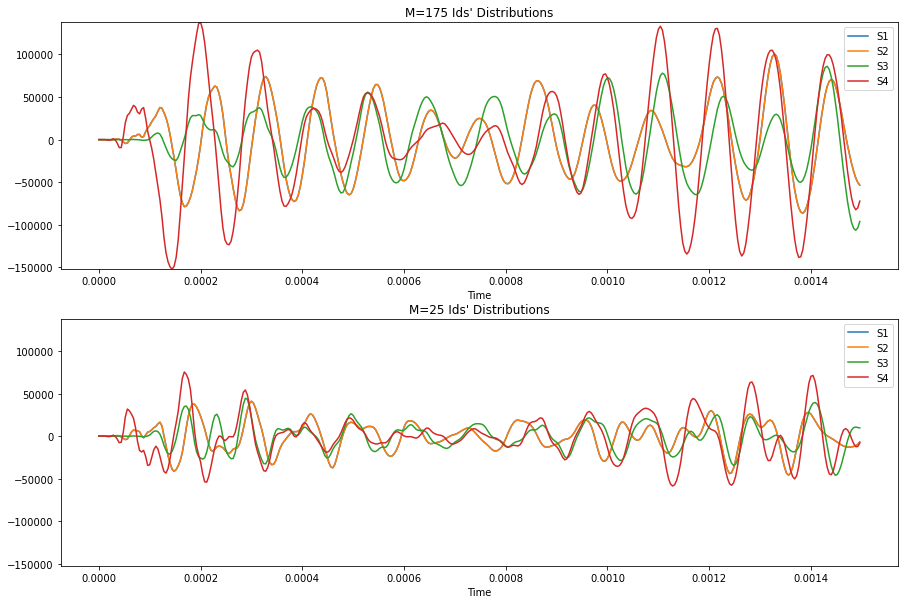

In [9]:
# M의 차이에 따른 분포 차이
def plot_by_Y(Y, min_value, max_value):
    M_175_id = train_target[train_target[Y]==max_value]['id']
    M_25_id = train_target[train_target[Y]==min_value]['id']

    M_175s = train[train['id'].isin(M_175_id)]
    M_25s = train[train['id'].isin(M_25_id)]

    f, ax = plt.subplots(2,1, figsize=(15,10))
    M_175s[['Time', 'S1', 'S2', 'S3', 'S4']].groupby('Time').mean().plot(ax=ax[0])
    M_25s[['Time', 'S1', 'S2', 'S3', 'S4']].groupby('Time').mean().plot(ax=ax[1])
    
    min_lim = min(M_175s[['Time', 'S1', 'S2', 'S3', 'S4']].groupby('Time').mean().min().min(), M_25s[['Time', 'S1', 'S2', 'S3', 'S4']].groupby('Time').mean().min().min())
    max_lim = max(M_175s[['Time', 'S1', 'S2', 'S3', 'S4']].groupby('Time').mean().max().max(), M_25s[['Time', 'S1', 'S2', 'S3', 'S4']].groupby('Time').mean().max().max())
    ax[0].set_title('{}={} Ids\' Distributions'.format(Y, max_value))
    ax[1].set_title('{}={} Ids\' Distributions'.format(Y, min_value))
    ax[0].set_ylim(min_lim, max_lim)
    ax[1].set_ylim(min_lim, max_lim)
plot_by_Y('M', 25, 175)

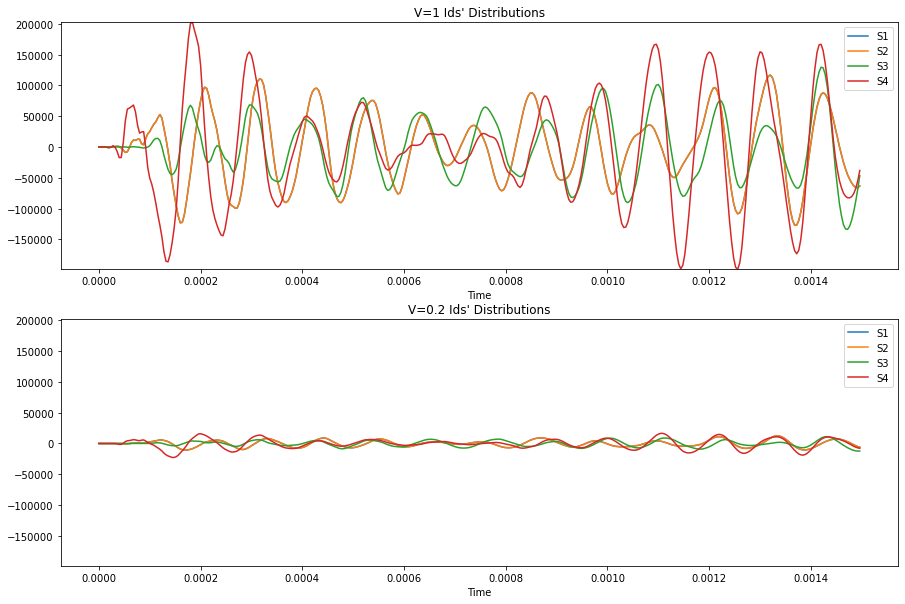

In [10]:
# V의 차이에 따른 분포 차이
plot_by_Y('V', 0.2, 1)

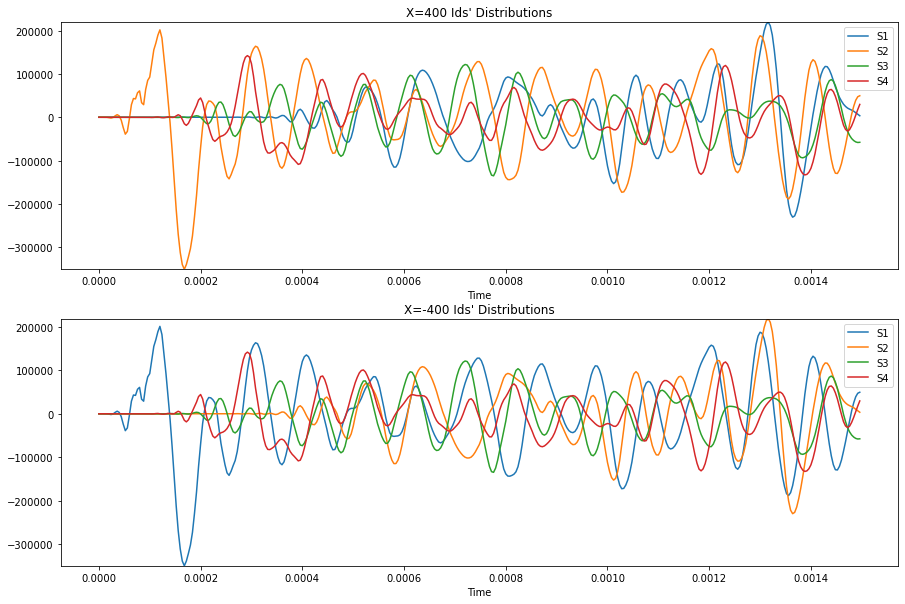

In [11]:
# X의 차이에 따른 분포 차이
plot_by_Y('X', -400, 400)

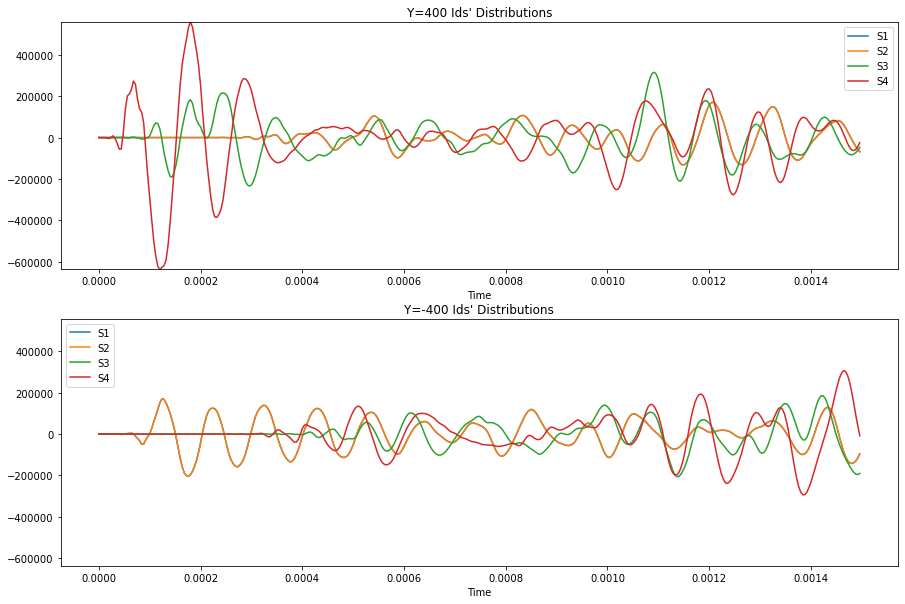

In [12]:
# Y의 차이에 따른 분포 차이
plot_by_Y('Y', -400, 400)

In [13]:
for x_val in train_target['X'].unique():
    for y_val in train_target['Y'].unique():
        print("---------------------좌표: ({}. {})-------------------".format(x_val, y_val))
        print(train_target[(train_target['X']==x_val)&(train_target['Y']==y_val)]['M'].value_counts())
        print(train_target[(train_target['X']==x_val)&(train_target['Y']==y_val)]['V'].value_counts()) 
# 매우 고르게 분포한 트레인셋이다. 모든게 대칭, 평등

---------------------좌표: (0.0. -400.0)-------------------
175.0    5
100.0    5
150.0    5
125.0    5
75.0     5
25.0     5
50.0     5
Name: M, dtype: int64
0.8    7
0.6    7
0.4    7
0.2    7
1.0    7
Name: V, dtype: int64
---------------------좌표: (0.0. 0.0)-------------------
125.0    5
100.0    5
75.0     5
25.0     5
150.0    5
50.0     5
175.0    5
Name: M, dtype: int64
0.4    7
0.6    7
0.8    7
0.2    7
1.0    7
Name: V, dtype: int64
---------------------좌표: (0.0. -200.0)-------------------
75.0     5
100.0    5
175.0    5
50.0     5
25.0     5
150.0    5
125.0    5
Name: M, dtype: int64
0.8    7
0.6    7
0.2    7
0.4    7
1.0    7
Name: V, dtype: int64
---------------------좌표: (0.0. -100.0)-------------------
75.0     5
100.0    5
150.0    5
50.0     5
25.0     5
175.0    5
125.0    5
Name: M, dtype: int64
0.4    7
0.6    7
0.8    7
0.2    7
1.0    7
Name: V, dtype: int64
---------------------좌표: (0.0. -300.0)-------------------
25.0     5
175.0    5
125.0    5
100.0    5
75.0 

175.0    5
100.0    5
150.0    5
25.0     5
125.0    5
50.0     5
75.0     5
Name: M, dtype: int64
0.4    7
0.6    7
0.8    7
0.2    7
1.0    7
Name: V, dtype: int64
---------------------좌표: (100.0. -100.0)-------------------
150.0    5
50.0     5
175.0    5
125.0    5
25.0     5
100.0    5
75.0     5
Name: M, dtype: int64
0.8    7
0.6    7
0.2    7
0.4    7
1.0    7
Name: V, dtype: int64
---------------------좌표: (100.0. -300.0)-------------------
75.0     5
25.0     5
175.0    5
100.0    5
150.0    5
50.0     5
125.0    5
Name: M, dtype: int64
0.2    7
0.6    7
0.8    7
0.4    7
1.0    7
Name: V, dtype: int64
---------------------좌표: (100.0. 200.0)-------------------
50.0     5
175.0    5
25.0     5
125.0    5
100.0    5
75.0     5
150.0    5
Name: M, dtype: int64
0.8    7
0.6    7
0.2    7
0.4    7
1.0    7
Name: V, dtype: int64
---------------------좌표: (100.0. 300.0)-------------------
50.0     5
100.0    5
150.0    5
25.0     5
75.0     5
125.0    5
175.0    5
Name: M, dtype: int64

In [14]:
# M과 V에 대해 알아보자
x_cor = 0; y_cor = -400
tmp = train[train['id'].isin(train_target[(train_target['X']==x_cor)&(train_target['Y']==y_cor)]['id'])].groupby('id').max()[['S1','S2']]
tmp = pd.concat([train_target[(train_target['X']==x_cor)&(train_target['Y']==y_cor)], tmp], axis=1)
tmp.sort_values(by=['M', 'V'])

,id,X,Y,M,V,S1,S2
2467,2467,0.0,-400.0,25.0,0.2,83573.12,83573.12
11,11,0.0,-400.0,25.0,0.4,251973.70,251973.70
1931,1931,0.0,-400.0,25.0,0.6,444965.60,444965.60
264,264,0.0,-400.0,25.0,0.8,667933.10,667933.10
342,342,0.0,-400.0,25.0,1.0,911861.40,911861.40
1315,1315,0.0,-400.0,50.0,0.2,101684.80,101684.80
0,0,0.0,-400.0,50.0,0.4,235080.90,235080.90
2073,2073,0.0,-400.0,50.0,0.6,478044.10,478044.10
2359,2359,0.0,-400.0,50.0,0.8,788045.20,788045.20
2116,2116,0.0,-400.0,50.0,1.0,1131967.00,1131967.00


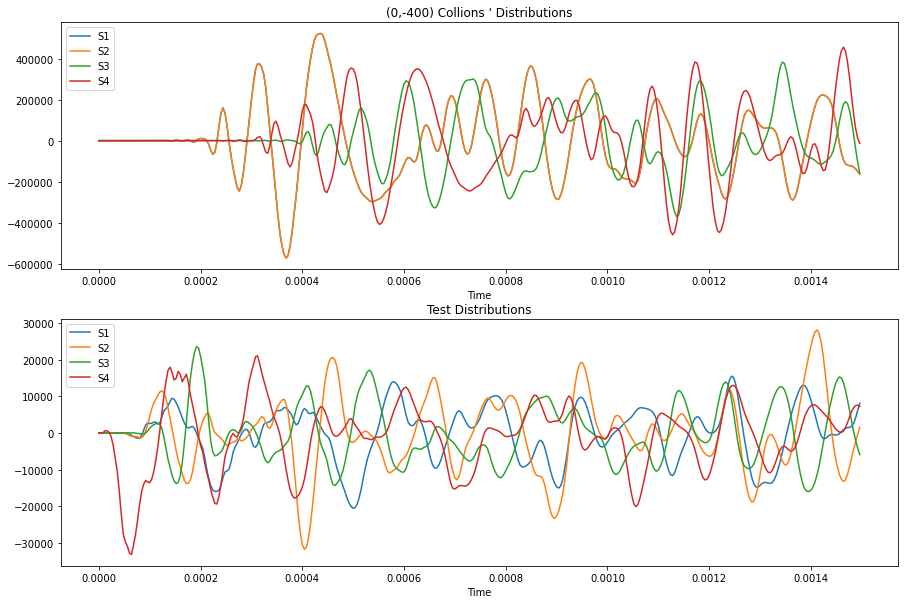

In [15]:
f, ax = plt.subplots(2, 1, figsize=(15,10))
x_cor = 0; y_cor = -400
tmp = train[train['id'].isin(train_target[(train_target['X']==x_cor)&(train_target['Y']==y_cor)]['id'])]
_ = tmp.groupby('Time')[['S1', 'S2', 'S3', 'S4']].mean().plot(ax=ax[0])
_ = test.groupby('Time')[['S1', 'S2', 'S3', 'S4']].mean().plot(ax=ax[1])
ax[0].set_title('(0,-400) Collions \' Distributions')
ax[1].set_title('Test Distributions')
plt.show()

### 파생변수들의 선형성

In [16]:
def min_max(data):
    min_table = data.groupby('id', as_index=False)[['S1', 'S2', 'S3', 'S4']].min()
    max_table = data.groupby('id', as_index=False)[['S1', 'S2', 'S3', 'S4']].max()
    return min_table.merge(max_table, how='left', on='id', suffixes=('_min', '_max'))

def std_mean(data):
    std_table = data.groupby('id')[['S1', 'S2', 'S3', 'S4']].std()
    mean_table = data.groupby('id', as_index=False)[['S1', 'S2', 'S3', 'S4']].agg(np.mean)
    return std_table.merge(mean_table, how='left', on='id', suffixes=('_std', '_mean'))

def first_arr_time(train):
    result = []
    for id_num in sorted(train['id'].unique()):
        tmp = []
        for S in ['S1', 'S2', 'S3', 'S4']:
            arr_time = 375 - (train[train['id']==id_num][S]!=0).sum()
            tmp.append(arr_time)
        result.append(tmp)
    result_df = pd.DataFrame(result)
    result_df.columns = ['S1_AT', 'S2_AT', 'S3_AT', 'S4_AT']
    result_df['id'] = sorted(train['id'].unique())
    return result_df

def AT_diff(train):
    train['AT_S1-S2'] = train['S1_AT'] - train['S2_AT']
    train['AT_S3-S4'] = train['S3_AT'] - train['S4_AT']
    
    train['AT_S1-S3'] = train['S1_AT'] - train['S3_AT']
    train['AT_S1-S4'] = train['S1_AT'] - train['S4_AT']
    train['AT_S2-S3'] = train['S2_AT'] - train['S3_AT']
    train['AT_S2-S4'] = train['S2_AT'] - train['S4_AT']
    return train

def corr(data):
    corr_dic_12 = collections.defaultdict(lambda x: 0)
    corr_dic_34 = collections.defaultdict(lambda x: 0)
    for id in train['id'].unique():
        dat = train[train['id']==id]
        corr_dic_12[id] = np.corrcoef(dat['S1'], dat['S2'])[0,1]
        corr_dic_34[id] = np.corrcoef(dat['S3'], dat['S4'])[0,1]

    for id in test['id'].unique():
        dat = test[test['id']==id]
        corr_dic_12[id] = np.corrcoef(dat['S1'], dat['S2'])[0,1]
        corr_dic_34[id] = np.corrcoef(dat['S3'], dat['S4'])[0,1]
        
    data['corr_12'] = data['id'].apply(lambda x:corr_dic_12[x])
    data['corr_34'] = data['id'].apply(lambda x:corr_dic_34[x])
    
    return data

# 고점들만 모아오기 
def getting_convex(train, id, S, desc=True, is_abs=False):
    vex = []
    prev_value = 0
    prev_trend = 0
    trend = 0
    for idx, value in enumerate(train[train['id']==id][S]):
        diff = value- prev_value
        if diff > 0:
            trend = 1
        elif diff == 0:
            trend = 0
            if prev_trend !=0:
                vex.append((prev_value, idx))
        else: 
            trend = -1

        if trend * prev_trend < 0 :
            if is_abs:
                vex.append((abs(prev_value), idx))
            else:
                vex.append((prev_value, idx))
        prev_value = value
        prev_trend = trend

    result = sorted(vex, key= lambda x: -x[0])
    if desc == False:
        result = sorted(vex, key= lambda x: x[0])
    return result

# 최고치들의 위치 가져오기
def getting_where_max(data, train, n):
    for i in range(n):
        for S in ['S1', 'S2', 'S3', 'S4']:
            data[S+'_where_{}th_max'.format(i)] = 0
            for id in data['id'].unique():
                vex = getting_convex(train, id, S)
                data[S+'_where_{}th_max'.format(i)][data['id']==id] = vex[i][1]
    return data

def getting_where_min(data, train, n):
    for i in range(n):
        for S in ['S1', 'S2', 'S3', 'S4']:
            data[S+'_where_{}th_min'.format(i)] = 0
            for id in data['id'].unique():
                vex = getting_convex(train, id, S, desc=False)
                data[S+'_where_{}th_min'.format(i)][data['id']==id] = vex[i][1]
    return data

def getting_where_abs_min(data, train, n):
    for i in range(n):
        for S in ['S1', 'S2', 'S3', 'S4']:
            data[S+'_where_{}th_abs_min'.format(i)] = 0
            for id in data['id'].unique():
                vex = getting_convex(train, id, S, desc=False, is_abs=True)
                data[S+'_where_{}th_abs_min'.format(i)][data['id']==id] = vex[i][1]
    return data

def getting_n_maxs(data, train):
    for S in ['S1', 'S2', 'S3', 'S4']:
        data[S+'_n_maxs'] = 0
        for id in data['id'].unique():
            vex = getting_convex(train, id, S)
            data[S+'_n_maxs'][data['id']==id] = len(vex)
    return data

# 최고치들의 수치 가져오기
def getting_value_max(data, train, n):
    for i in range(n):
        for S in ['S1', 'S2', 'S3', 'S4']:
            data[S+'_value_{}th_max'.format(i)] = 0
            for id in data['id'].unique():
                vex = getting_convex(train, id, S)
                data[S+'_value_{}th_max'.format(i)][data['id']==id] = vex[i][0]
    return data

def getting_value_min(data, train, n):
    for i in range(n):
        for S in ['S1', 'S2', 'S3', 'S4']:
            data[S+'_value_{}th_min'.format(i)] = 0
            for id in data['id'].unique():
                vex = getting_convex(train, id, S, desc=False)
                data[S+'_value_{}th_min'.format(i)][data['id']==id] = vex[i][0]
    return data


In [17]:
# train
n =3
master = train.copy()
master = train_target.merge(min_max(master), how='left', on='id').merge(std_mean(master), how='left', on='id')\
.merge(first_arr_time(master), how='left', on='id')
master = AT_diff(master)
master = getting_where_max(master,train, n)
master = getting_where_min(master,train, n)
master = getting_n_maxs(master, train)
# master = getting_value_max(master,train, n)
# master = getting_value_min(master,train, n)
master = getting_where_abs_min(master,train, n)

# test
test_master = test.copy()
test_master = min_max(test_master).merge(std_mean(test_master), how='left', on='id').merge(first_arr_time(test_master), how='left', on='id')
test_master = AT_diff(test_master)
test_master = getting_where_max(test_master,test, n)
test_master = getting_where_min(test_master,test, n)
test_master = getting_n_maxs(test_master, test)
# test_master = getting_value_max(test_master,test, n)
# test_master = getting_value_min(test_master,test, n)
test_master = getting_where_abs_min(test_master,test, n)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:107: SettingWithCopyWarning: 
A value is trying to

In [18]:
def JB(y):
    result = []
    for i, value in enumerate(y):
        if i == 0:
            result.append(value)
            continue
        result.append(result[-1] + value)
    return result

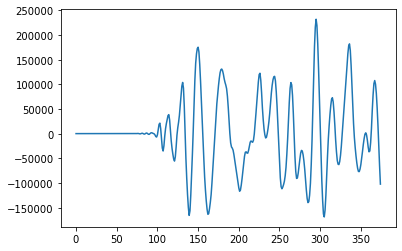

In [19]:
plt.plot(train[train['id']==0]['S3'])
plt.show()

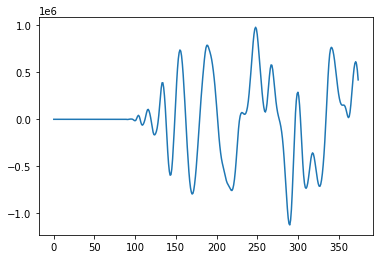

In [20]:
plt.plot(JB(train[train['id']==0]['S3']))
plt.show()

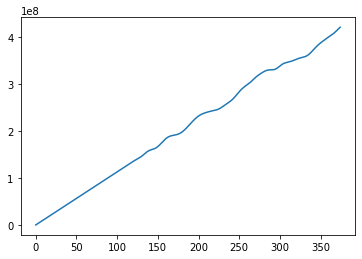

In [21]:
t = np.array(JB(train[train['id']==0]['S3']))
t += -np.min(t)
plt.plot(JB(t))
plt.show()